## This notebook serves as a helper to view saved `scores.npy` or `sample.npy` samples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [18]:
## Load sample or score

samples = np.load("comparisons/saves/cifar1_ddim/samples.npy")

#samples = np.load("fast_diffusion/saves/cifar1/scores.npy")


In [19]:
def plot_sample(samples, num_frames=10):
  sample_batch_size = samples.shape[1]
  def get_frame(i, sample_idx):
    return ((samples[i, sample_idx] - samples[i, sample_idx].min())/(samples[i, sample_idx].max() - samples[i, sample_idx].min())).transpose(1, 2, 0)

  fig, ax = plt.subplots(sample_batch_size, num_frames, figsize=(32, 30 * sample_batch_size/num_frames))
  s = np.round(np.linspace(0, samples.shape[0] - 1, num=num_frames)).astype(int)

  if sample_batch_size == 1:
    for idx, col in zip(s, ax):
        col.imshow(get_frame(idx, 0), aspect="auto")
  else:
    for sample_number, row in enumerate(ax):
      for idx, col in zip(s, row):
        col.imshow(get_frame(idx, sample_number), aspect="auto")
  
  return fig

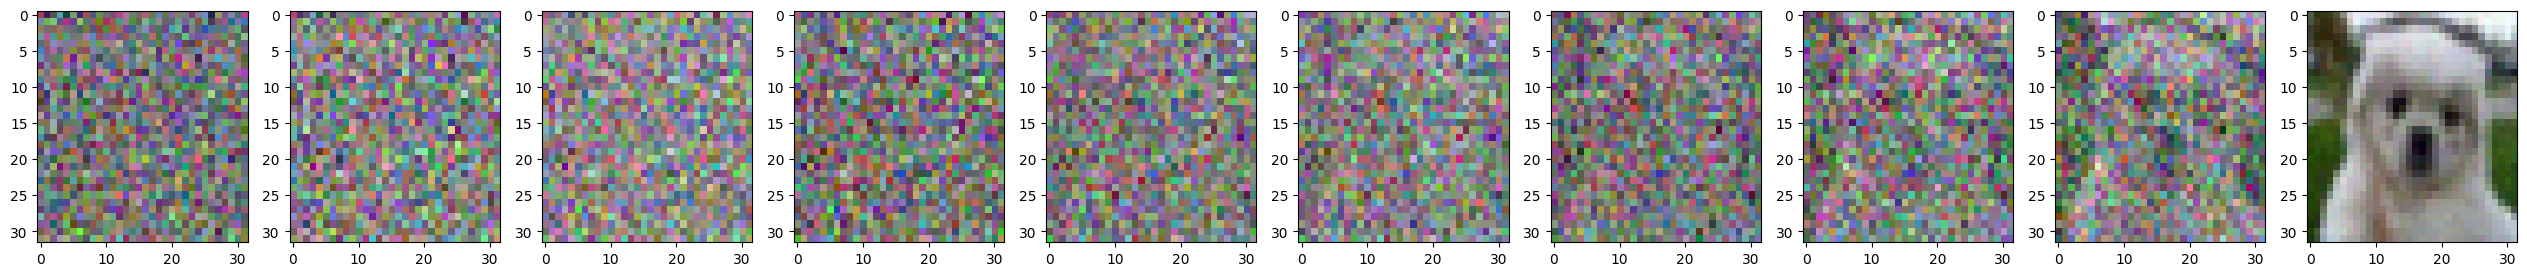

In [20]:
plot_sample(samples);

## Optional: Generate a GIF of a sample or score

In [23]:
def generate_gif(samples, sample_idx=0):
    def get_frame(i):
        return ((samples[i, sample_idx] - samples[i, sample_idx].min())/(samples[i, sample_idx].max() - samples[i, sample_idx].min())).transpose(1, 2, 0)

    fig = plt.figure(figsize=(8,8));

    im = plt.imshow(get_frame(0), animated=True)

    def frame(i):
        if i >= len(samples):
            im.set_data(get_frame(-1));
        else:
            im.set_data(get_frame(i));

        return [im]

    animation_fig = animation.FuncAnimation(fig, frame, frames=samples.shape[0] + 20, blit=False);

    animation_fig.save("animation.gif", writer=animation.PillowWriter(fps=10));

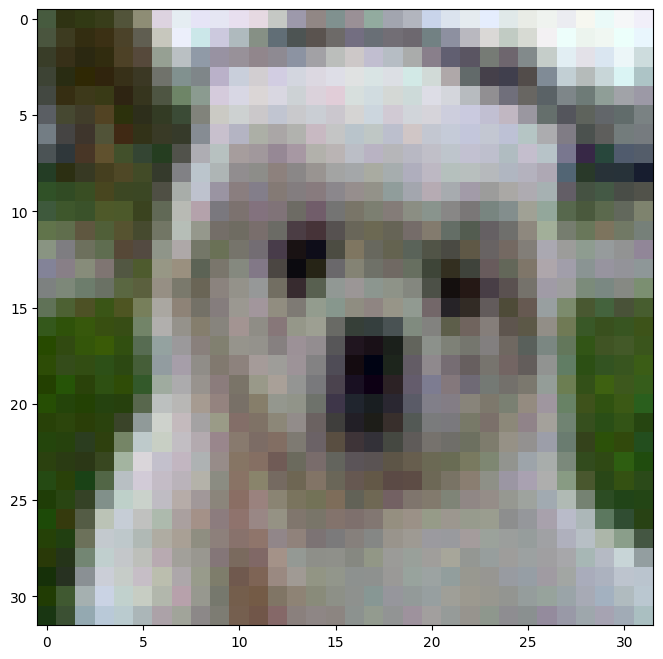

In [24]:
generate_gif(samples, sample_idx=0)